# Diamond Price Prediction

The aim of this analysis is to predict the price of diamonds based on their characteristics. The dataset used for this analysis is the Diamonds dataset from Kaggle. The dataset contains 53940 observations and 10 variables. The variables are as follows:


|Column Name|Description|
|-----------|-----------|
|carat|Weight of the diamond|
|cut|Quality of the cut (Fair, Good, Very Good, Premium, Ideal)|
|color|Diamond colour, from J (worst) to D (best)|
|clarity|How clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|x|Length in mm|
|y|Width in mm|
|z|Depth in mm|
|depth|Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)|
|table|Width of top of diamond relative to widest point (43--95)|
|price|Price in US dollars (326--18,823)|


In [265]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
#loading the dataset
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Preprocessing

In [267]:
df.shape

(50000, 10)

In [268]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [269]:
#checking descriptive statistics
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [270]:
#values count of categorical variables
print(df.cut.value_counts(),'\n',df.color.value_counts(),'\n',df.clarity.value_counts())

cut
Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: count, dtype: int64 
 color
G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: count, dtype: int64 
 clarity
SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: count, dtype: int64


In [271]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Exploratory Data Analysis

<Axes: xlabel='price', ylabel='Count'>

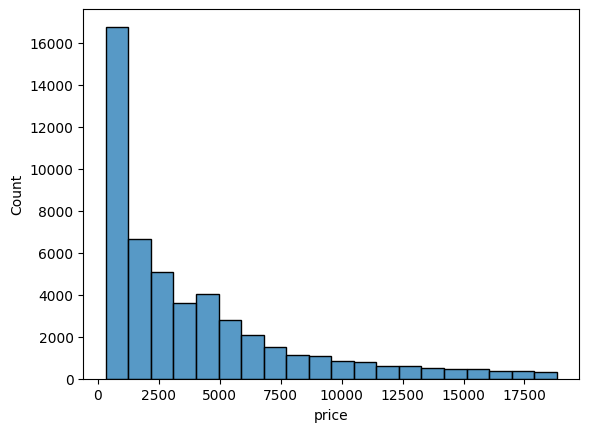

In [272]:
sns.histplot(df['price'],bins = 20)

<Axes: xlabel='carat', ylabel='Count'>

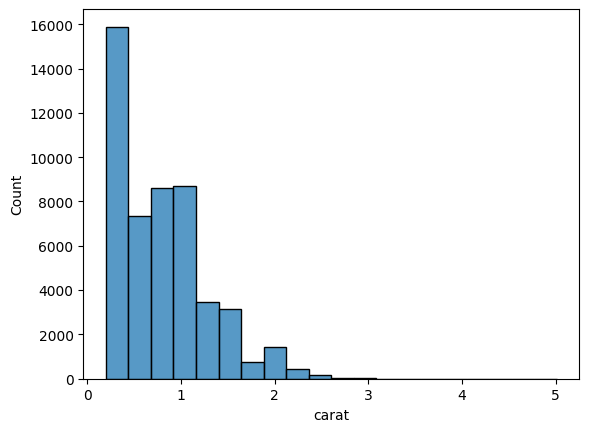

In [273]:
sns.histplot(df['carat'],bins=20)

Most of the diamonds are less then 1 carat in weight.

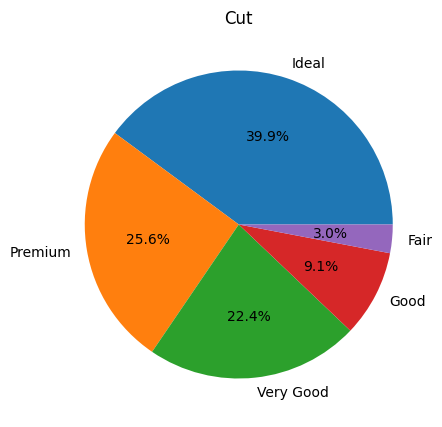

In [274]:
plt.figure(figsize=(5,5))
plt.pie(df['cut'].value_counts(),labels=['Ideal','Premium','Very Good','Good','Fair'],autopct='%1.1f%%')
plt.title('Cut')
plt.show()

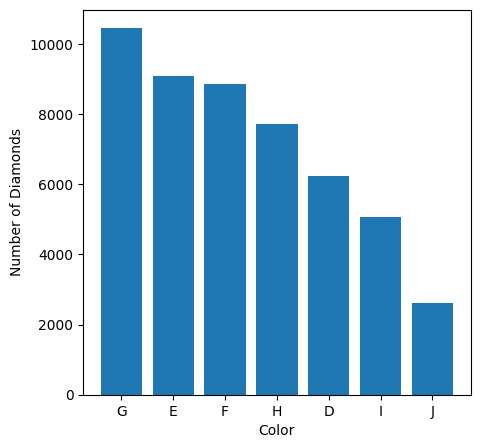

In [275]:
plt.figure(figsize=(5,5))
plt.bar(df['color'].value_counts().index,df['color'].value_counts())
plt.ylabel("Number of Diamonds")
plt.xlabel("Color")
plt.show()

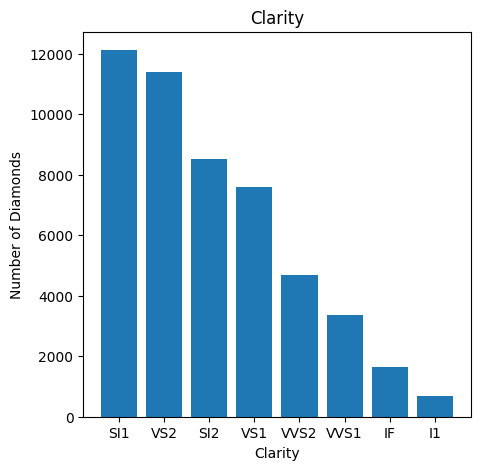

In [276]:
plt.figure(figsize=(5,5))
plt.bar(df['clarity'].value_counts().index,df['clarity'].value_counts())
plt.title('Clarity')
plt.ylabel("Number of Diamonds")
plt.xlabel("Clarity")
plt.show()

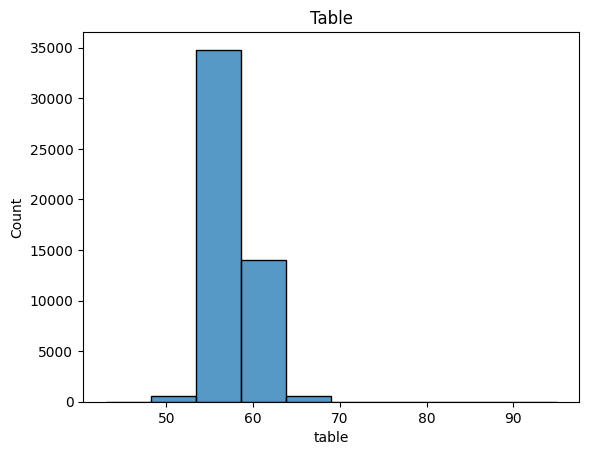

In [277]:
sns.histplot(df['table'],bins=10)
plt.title('Table')
plt.show()

### Comparing Diamond's features with Price

<Axes: xlabel='cut', ylabel='price'>

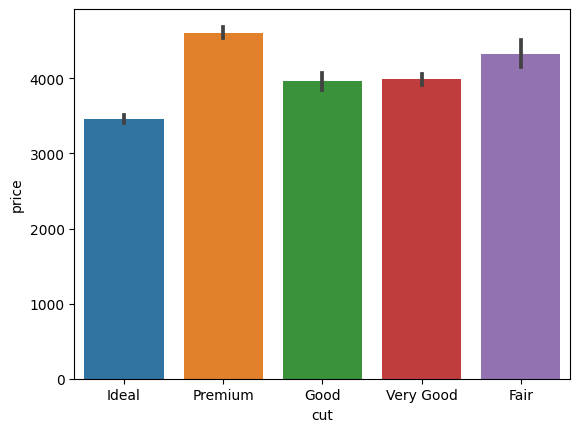

In [278]:
sns.barplot(x='cut',y='price',data=df)

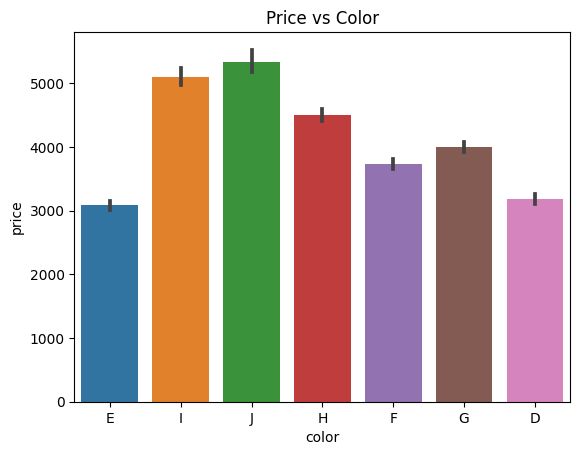

In [279]:
sns.barplot(x='color',y='price',data=df)
plt.title('Price vs Color')
plt.show()

<Axes: xlabel='clarity', ylabel='price'>

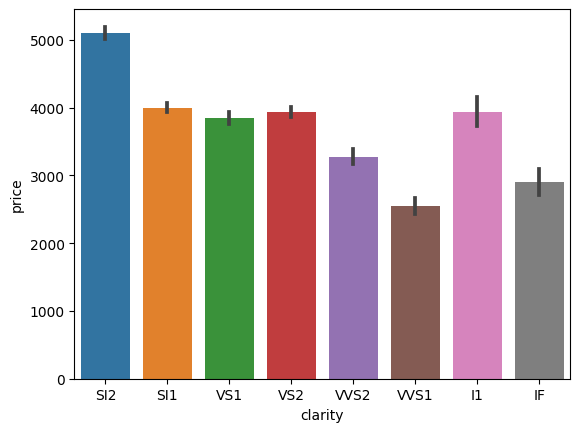

In [280]:
sns.barplot(x = 'clarity', y = 'price', data = df)

J color and I1 clarity are worst featiures for a diamond, however when the data is plotted on bar graph, it is seen that the price of diamonds with J color and I1 clarity is higher than the price of diamonds with D color and IF clarity, which is opposite to what I expected.